In [1]:
import PreprocessText
import EntropyCount

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dir = "teksty/nasz_dziennik/wirus/"

In [4]:
file = "1.txt"

In [5]:
process1 = PreprocessText.whole_proces_polish(dir, file, verbose=True)

Wielkopolskie: Piąte ognisko ptasiej grypy
Czwartek, 23 stycznia 2020 (21:14)

Piąte ognisko ptasiej grypy potwierdzono w Wielkopolsce w gospodarstwie
['Piąte ognisko ptasiej grypy potwierdzono w Wielkopolsce w gospodarstwie w Radłowie, w powiecie ostrowskim - poinformował wojewódzki lekarz weterynarii w Poznaniu Andrzej Żarnecki.', 'Do tej pory – jak poinformował PAP wojewódzki lekarz weterynarii w Poznaniu Andrzej Żarnecki – potwierdzono pięć przypadków ptasiej grypy ptaków w Wielkopolsce.', 'Pierwszy przypadek pojawienia się ptasiej grypy – przypomniał Żarnecki – służby weterynaryjne ujawniły 31 grudnia ub.r. w Topoli Osiedlu w powiecie ostrowskim. Wirus H5N8 wystąpił na fermie, gdzie hodowano 65 tys. kur niosek.', 'Drugim razem obecność wirusa potwierdzono 13 stycznia na fermie w miejscowości Zalesie w powiecie kolskim, gdzie wybito 6 tys. gęsi.', 'Trzy dni później, 15 stycznia, w miejscowości Słaborowice w powiecie ostrowskim w gospodarstwie wybito 21 tys. zarażonych kaczek.', 'Na

In [6]:
process1[:20]

['Piąty',
 'ognisko',
 'ptasi',
 'grypa',
 'potwierdzony',
 'w',
 'Wielkopolska',
 'w',
 'gospodarstwo',
 'w',
 'Radłów',
 'w',
 'powiat',
 'ostrowski',
 'poinformować',
 'wojewódzki',
 'lekarz',
 'weterynaria',
 'w',
 'Poznań']

In [7]:
EntropyCount.calculate_entropy_for_all_words(process1)

(7.070629968236177, 341)

In [8]:
def preprocess_paper(dir_, range_limit, paper_name):
    
    list_articles = []
    
    for n in range(5):
        file = str(n+1) + ".txt"

        prep = PreprocessText.whole_proces_polish(dir_, file)
        entropy, amount_tokens = EntropyCount.calculate_entropy_for_all_words(prep)

        list_this = []
        list_this.append(n)
        list_this.append(paper_name)
        list_this.append(prep[:3])
        list_this.append(amount_tokens)
        list_this.append(entropy)
        
        list_articles.append(list_this)
    
    return list_articles
    

In [9]:
dir_ = "teksty/nasz_dziennik/wirus/"
paper_name = "Nasz Dziennik"
articles_amount = 5

list_nasz = preprocess_paper(dir_, articles_amount, paper_name)



1.txt
1
2.txt
2
3.txt
3
4.txt
4
5.txt
5


In [10]:
list_nasz

[[0, 'Nasz Dziennik', ['Piąty', 'ognisko', 'ptasi'], 341, 7.070629968236177],
 [1,
  'Nasz Dziennik',
  ['mieć', 'dobrze', 'przygotowany'],
  495,
  7.460492771980687],
 [2,
  'Nasz Dziennik',
  ['Ukraina', 'zgłosić', 'pojawienie'],
  180,
  6.507227821789562],
 [3,
  'Nasz Dziennik',
  ['Czeski', 'służba', 'weterynaryjny'],
  120,
  6.284631975083053],
 [4, 'Nasz Dziennik', ['być', 'podejrzenie', 'ptasi'], 212, 6.726595662956001]]

In [11]:
df_nasz = pd.DataFrame(list_nasz, columns = ["Numer artykułu", "Nazwa gazety", "Pierwsze lematy", "Ilość tokenów", "Entropia"])

In [12]:
df_nasz

,Numer artykułu,Nazwa gazety,Pierwsze lematy,Ilość tokenów,Entropia
0,0,Nasz Dziennik,"[Piąty, ognisko, ptasi]",341,7.070630
1,1,Nasz Dziennik,"[mieć, dobrze, przygotowany]",495,7.460493
2,2,Nasz Dziennik,"[Ukraina, zgłosić, pojawienie]",180,6.507228
3,3,Nasz Dziennik,"[Czeski, służba, weterynaryjny]",120,6.284632
4,4,Nasz Dziennik,"[być, podejrzenie, ptasi]",212,6.726596


In [13]:
dir_ = "teksty/gazeta_wyborcza/wirus/"
paper_name = "Gazeta Wyborcza"
articles_amount = 5

list_gw = preprocess_paper(dir_, articles_amount, paper_name)



1.txt
1
2.txt
2
3.txt
3
4.txt
4
5.txt
5


In [14]:
df_gw = pd.DataFrame(list_gw, columns = ["Numer artykułu", "Nazwa gazety", "Pierwsze lematy", "Ilość tokenów", "Entropia"])

In [15]:
df_gw

,Numer artykułu,Nazwa gazety,Pierwsze lematy,Ilość tokenów,Entropia
0,0,Gazeta Wyborcza,"[Szampański, zabawa, połączony]",243,7.305123
1,1,Gazeta Wyborcza,"[grypa, dopaść, ja]",321,7.405729
2,2,Gazeta Wyborcza,"[często, czytany, pierwszy]",1028,8.126686
3,3,Gazeta Wyborcza,"[w, chiński, miasto]",340,7.333134
4,4,Gazeta Wyborcza,"[Spełnie, się, ten]",129,6.264091


In [16]:
enntropy_mean_nd = df_nasz.loc[:,"Entropia"].mean()

# list_en_mean_nd = pd.Series("", "", "", "", enntropy_mean_nd)

# df_nasz = df_nasz.append(list_en_mean_nd)

In [17]:
df_nasz

,Numer artykułu,Nazwa gazety,Pierwsze lematy,Ilość tokenów,Entropia
0,0,Nasz Dziennik,"[Piąty, ognisko, ptasi]",341,7.070630
1,1,Nasz Dziennik,"[mieć, dobrze, przygotowany]",495,7.460493
2,2,Nasz Dziennik,"[Ukraina, zgłosić, pojawienie]",180,6.507228
3,3,Nasz Dziennik,"[Czeski, służba, weterynaryjny]",120,6.284632
4,4,Nasz Dziennik,"[być, podejrzenie, ptasi]",212,6.726596


In [18]:
enntropy_mean_gw = df_gw.loc[:,"Entropia"].mean()

In [19]:
l_ent_nd = ["Nasz Dziennik", enntropy_mean_nd]
l_ent_gw = ["Gazeta Wyborcza", enntropy_mean_gw]
l_ent_mean = [l_ent_nd, l_ent_gw]

In [20]:
l_ent_mean

[['Nasz Dziennik', 6.809915640009095], ['Gazeta Wyborcza', 7.286952841718576]]

In [21]:
df_mean = pd.DataFrame(l_ent_mean, columns = ["Nazwa Gazety", "Średnia"])

In [22]:
df_mean

,Nazwa Gazety,Średnia
0,Nasz Dziennik,6.809916
1,Gazeta Wyborcza,7.286953


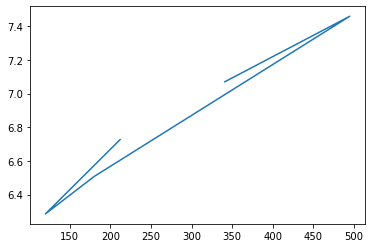

In [23]:
plt.plot(df_nasz.loc[:,"Ilość tokenów"], df_nasz.loc[:,"Entropia"])

In [24]:
# p1, = host.plot(df_nasz.loc[:,"Ilość tokenów"], df_nasz.loc[:,"Entropia"], "b-", label="Nasz Dziennik")
# p2, = par1.plot(df_gw.loc[:,"Ilość tokenów"], df_gw.loc[:,"Entropia"], "b-", label="Gazeta Wyborcza")

In [25]:
# plt.plot(df_nasz.loc[:,"Ilość tokenów"].sort_values(by=['Ilość tokenów'], df_nasz.loc[:,"Entropia"], 'r--', df_gw.loc[:,"Ilość tokenów"], df_gw.loc[:,"Entropia"], 'bs-')
# plt.show()

In [26]:
df_nasz.sort_values(by=['Ilość tokenów']).loc[:,"Ilość tokenów"]

3    120
2    180
4    212
0    341
1    495
Name: Ilość tokenów, dtype: int64

In [27]:
df_nasz.sort_values(by=['Ilość tokenów']).loc[:,"Entropia"]

3    6.284632
2    6.507228
4    6.726596
0    7.070630
1    7.460493
Name: Entropia, dtype: float64

In [28]:
df_gw_tokens = df_gw.sort_values(by=['Ilość tokenów'])
df_gw_tokens

,Numer artykułu,Nazwa gazety,Pierwsze lematy,Ilość tokenów,Entropia
4,4,Gazeta Wyborcza,"[Spełnie, się, ten]",129,6.264091
0,0,Gazeta Wyborcza,"[Szampański, zabawa, połączony]",243,7.305123
1,1,Gazeta Wyborcza,"[grypa, dopaść, ja]",321,7.405729
3,3,Gazeta Wyborcza,"[w, chiński, miasto]",340,7.333134
2,2,Gazeta Wyborcza,"[często, czytany, pierwszy]",1028,8.126686


In [29]:
df_nd_tokens = df_nasz.sort_values(by=['Ilość tokenów'])
df_nd_tokens

,Numer artykułu,Nazwa gazety,Pierwsze lematy,Ilość tokenów,Entropia
3,3,Nasz Dziennik,"[Czeski, służba, weterynaryjny]",120,6.284632
2,2,Nasz Dziennik,"[Ukraina, zgłosić, pojawienie]",180,6.507228
4,4,Nasz Dziennik,"[być, podejrzenie, ptasi]",212,6.726596
0,0,Nasz Dziennik,"[Piąty, ognisko, ptasi]",341,7.070630
1,1,Nasz Dziennik,"[mieć, dobrze, przygotowany]",495,7.460493


In [30]:
df_gw_tokens["Entropia"]

4    6.264091
0    7.305123
1    7.405729
3    7.333134
2    8.126686
Name: Entropia, dtype: float64

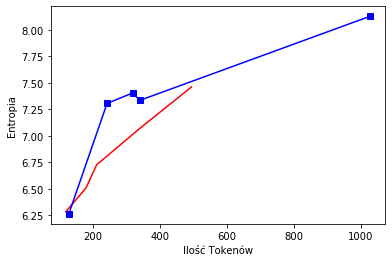

In [31]:
plt.plot(df_nd_tokens.loc[:,"Ilość tokenów"], df_nd_tokens.loc[:,"Entropia"], 'r-', df_gw_tokens.loc[:,"Ilość tokenów"], df_gw_tokens.loc[:,"Entropia"], 'bs-')
plt.xlabel('Ilość Tokenów')
plt.ylabel('Entropia')
plt.savefig('foo.png')
plt.show()